In [141]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

#### Data Creation

In [139]:
def create_data(start=0, stop=10, step=1, noise=0, slope=1, intercept_y=0, plot=False):
    """Creates data as specified"""
    x = np.arange(start,stop,step)
    y = (intercept_y) + (slope)*x
    y_noise = y + noise * np.random.randn(*y.shape)

    if(plot):
        sns.scatterplot(x,y,label='Normal Data')
        sns.scatterplot(x,y_noise,label='Noised Data')
        sns.despine(offset=10)
        plt.show()
    
    return {'x':x,'y':y,'y_noise':y_noise}

##### RSS (Residual Sum of Squares) - Cost Function

In [97]:
def RSS(x=None, y=None, weight_0=0.0, weight_1=0.0):
    """Calculates and returns the Residual Square Sum for univarient Linear Regression

    x = the independent variable column, could be a list, numpy array
    y = the dependent variable column, could be a list, numpy array
    weight_0 = First weight / Y Intercept
    weight_1 = Second weight / Slope
    
    Warning(s):
    x and y lengths should be same or it will return the answer over the iterations of the smallest among two because zip function is used"""
    return np.sum(((y-(weight_0 + weight_1*x))**2 for x,y in zip(x,y)))

In [98]:
def RSS_for_gd(errors=None):
    """RSS function specially re-defined to calculate cost particularly to be called from gradient_descent function.
    
    errors = the errors in prediction of y as a vector
    
    returns: Residual Sum of Squares/Cost"""
    return np.sum(errors**2)

#### Gradient Descent

In [99]:
def gradient_descent(x=None, y=None, slope=0, intercept=0, step_size=0.00001,tolerance_gradient=0.01, tolerance_cost=0.00001):
    """Calculates slope and intercept which give (close to) minimum possible cost, where derivative is (supposedly) zero.
    
    x = the independent variable column, could be a list, numpy array
    y = the dependent variable column, could be a list, numpy array
    slope = (default =) 0
    intercept = (default =) 0
    step_size =  (default =) 0.00001, the alpha - helps scale the value of derivatives
    tolerance_gradient = (default =) 0.01, how much to tolerate for the value of magnitude of gradient
    tolerance_cost = (default =) 0.00001, how much to tolerate for the value of cost
    
    return: a dictionary containing calculated slope, intercept, number of iterations and reason of convergence
    """
    i = 0
    cost_prev = 1000000
    while(True):
        i += 1
        predicted_values = np.add(intercept,np.multiply(slope,x))
        errors = np.subtract(predicted_values,y)
        
        intercept_grad = np.sum(errors)
        intercept -= step_size*intercept_grad
        
        slope_grad = np.sum(np.multiply(errors,x))
        slope -= step_size*slope_grad
        
        magnitude = np.sqrt( np.sum(errors)**2 + np.sum( np.multiply(errors,x) )**2 )
       
        cost = RSS_for_gd(errors=errors)

        #print('i = %3d | Inter_Grad: %2.2f | Intrcpt: %2.2f |  S_Grad: %2.2f  | Slope: %2.2f | Magnitude: %2.2f | RSS: %2.2f' % (i,intercept_grad, intercept,slope_grad,slope,magnitude,RSS_for_gd(errors=errors)))
#         if i%10000 == 0:
#             print("Cost difference: %.20f" % abs(cost - cost_prev))
#             print("Gradient Magnitude: %.20f" % magnitude)
#             print()
        
        if(abs(cost - cost_prev) < tolerance_cost):
            return {'intercept':intercept,'slope':slope,'iterations':i,'reason':'Cost tolerance satisfied'}
            
        if magnitude <= tolerance_gradient:
            return {'intercept':intercept,'slope':slope,'iterations':i,'reason':'Gradient tolerance satisfied'}
        
        cost_prev = cost

In [171]:
data = create_data(0,100,1,5,2,1,False)
x,y,y_noise = data['x'],data['y'],data['y_noise']

In [172]:
result = gradient_descent(x=x,y=y_noise,step_size=0.000001,tolerance_gradient=0.00001, tolerance_cost = 0.00000000000000001)
print('Completed')
print('Reason: ',result['reason'])
print('Intercept: ',result['intercept'])
print('Slope: ', result['slope'])
print('Iterations: ', result['iterations'])

Completed
Reason:  Cost tolerance satisfied
Intercept:  0.7626627492602882
Slope:  2.014143972732023
Iterations:  373982


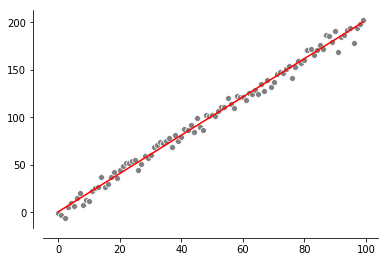

In [173]:
sns.scatterplot(x,y_noise,color='grey')
y_bar = float(result['intercept'])+ np.multiply(float(result['slope']),x)
sns.lineplot(x,y_bar,color='red')
sns.despine(offset=10)
plt.show()